In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import glob
import requests
import time

from scipy.stats import mannwhitneyu 

import cobra

In [2]:
### Graphics parameters:
# ----------------------
size=19
params = {'legend.fontsize': 12,
          'axes.labelsize': 17,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
#           'figure.figsize': (13*0.65,6.5*0.75),
            'axes.titlepad': 10}
plt.rcParams.update(params)

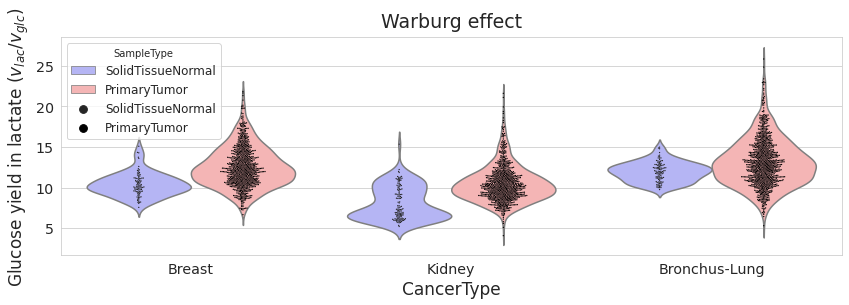

Breast
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.37178047561462
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.532385897311206
		 MannwhitneyuResult(statistic=66721.0, pvalue=8.938732404026978e-20) 

Kidney
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.10732824824329
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.48040132345743
		 MannwhitneyuResult(statistic=89685.0, pvalue=9.352124336517317e-26) 

Bronchus-Lung
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.956351894250524
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 13.070390473609065
		 MannwhitneyuResult(statistic=69166.0, pvalue=2.599734565752592e-05) 



/tmp/ipykernel_249385/3124575130.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['CancerType']==cancer]['LactateFlux'])
/tmp/ipykernel_249385/3124575130.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['CancerType']==cancer]['LactateFlux'])


In [3]:
### Figure 4:
# -----------
files = ['Breast_fluxes.csv', 'Kidney_fluxes.csv', 'Bronchus-Lung_fluxes.csv']
sampleTypes, cancerTypes, lactateFluxes=[],[],[]
for file in files:
    allfluxes = pd.read_csv(file, sep='\t', lineterminator='\n').set_index("Reaction")
    # data
    for sample in allfluxes.columns:
        sampleType = sample.split("_")[0]
        
        if sampleType in ["SolidTissueNormal","PrimaryTumor"]:
            # sample type
            sampleTypes.append(sampleType)
            # cancer type
            cancerType = file.split("_")[0]
            cancerTypes.append(cancerType)
            # glucose yield in lactate
            beta = abs(1/allfluxes[sample].loc["R_EX_glc__D_e"])
            lactateFlux = allfluxes[sample].loc['R_EX_lac__L_e']*beta
            lactateFluxes.append(lactateFlux)
            
# dataframe
df = pd.DataFrame( data = {'SampleType': sampleTypes,
                           'CancerType': cancerTypes,
                           'LactateFlux': lactateFluxes })

# graphic
order=['Breast', 'Kidney', 'Bronchus-Lung']
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
palette = sns.color_palette('bwr',n_colors=2,desat=1)
plt.figure(figsize=(14,4))

ax = sns.swarmplot(x='CancerType',
                   y="LactateFlux",
                   hue="SampleType",
                   hue_order=["SolidTissueNormal","PrimaryTumor"],
                   dodge=True,
                   data=df,
                   size=1.3,
                   color='black',
                   order=order).set_title('Warburg effect')
#violinplot
ax = sns.violinplot(x='CancerType',
                    y="LactateFlux",
                    hue="SampleType",
                    hue_order=["SolidTissueNormal","PrimaryTumor"],
                    scale='width', # width or area
                    scale_hue=True,
                    gridsize=1000,
                    dodge=True,
                    inner=None,
                    linewidth=1.5,
                    data=df,
                    palette=palette,
                    order=order).set_title('Warburg effect')
plt.ylabel("Glucose yield in lactate ($v_{lac}/v_{glc}$)")
# plt.savefig('warburgeffect.svg', bbox_inches="tight") #save fig

plt.show()

# Mann-Whitney test
for cancer in ['Breast', 'Kidney', 'Bronchus-Lung']:
    print(cancer)
    normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['CancerType']==cancer]['LactateFlux'])
    tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['CancerType']==cancer]['LactateFlux'])
    print('\tAverage $v_{lac}/v_{glc}$ Normal Tissue:', np.mean(normalTissue))
    print('\tAverage $v_{lac}/v_{glc}$ Tumor Tissue:', np.mean(tumorTissue))
    res = mannwhitneyu(tumorTissue, normalTissue, alternative="greater")
    print ('\t\t',res,"\n")

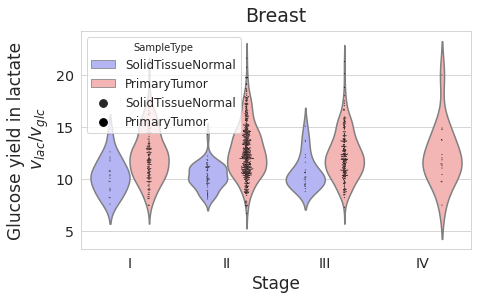

Breast
p-value between normal tissue and tumor tissue per stage
	Stage: I
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.31
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.248
		 MannwhitneyuResult(statistic=2132.0, pvalue=0.00028326788541350756) 

	Stage: II
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.252
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.692
		 MannwhitneyuResult(statistic=21118.0, pvalue=6.040224641213302e-14) 

	Stage: III
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.694
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.292
		 MannwhitneyuResult(statistic=3532.0, pvalue=0.00016894111302831873) 

	Stage: IV
	Average $v_{lac}/v_{glc}$ Normal Tissue: nan
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.236
		 MannwhitneyuResult(statistic=0.0, pvalue=1.0) 




/tmp/ipykernel_249385/272904754.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
/tmp/ipykernel_249385/272904754.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])
/opt/Python-3.8.3/lib/python3.8/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/ngonzalez/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ngonzalez/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


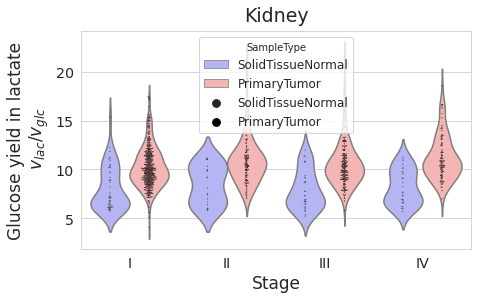

Kidney
p-value between normal tissue and tumor tissue per stage
	Stage: I
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.056
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.258
		 MannwhitneyuResult(statistic=17552.0, pvalue=1.453171470823546e-10) 

	Stage: II
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.472
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.779
		 MannwhitneyuResult(statistic=1626.0, pvalue=5.317708172672836e-05) 

	Stage: III
	Average $v_{lac}/v_{glc}$ Normal Tissue: 7.899
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.491
		 MannwhitneyuResult(statistic=4742.0, pvalue=1.1298826733943636e-08) 

	Stage: IV
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.167
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 11.209
		 MannwhitneyuResult(statistic=2457.0, pvalue=6.138157019738507e-09) 




/tmp/ipykernel_249385/272904754.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
/tmp/ipykernel_249385/272904754.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])


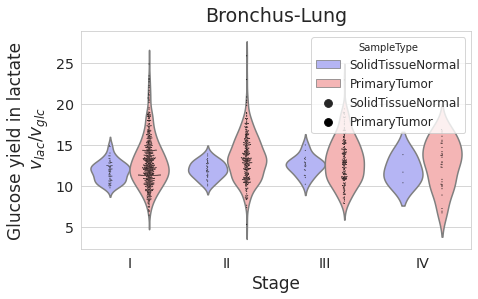

Bronchus-Lung
p-value between normal tissue and tumor tissue per stage
	Stage: I
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.804
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.913
		 MannwhitneyuResult(statistic=18208.0, pvalue=0.0046687053888943685) 

	Stage: II
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.969
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 13.39
		 MannwhitneyuResult(statistic=5786.0, pvalue=0.0007279009124924042) 

	Stage: III
	Average $v_{lac}/v_{glc}$ Normal Tissue: 12.495
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 13.106
		 MannwhitneyuResult(statistic=1697.0, pvalue=0.2107235238629222) 

	Stage: IV
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.937
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.655
		 MannwhitneyuResult(statistic=58.0, pvalue=0.32351536019020505) 




/tmp/ipykernel_249385/272904754.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
/tmp/ipykernel_249385/272904754.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])


In [4]:
### Figure 5:
# -----------
files = ['Breast_fluxes.csv', 'Kidney_fluxes.csv', 'Bronchus-Lung_fluxes.csv']

for i, file in enumerate(files):
    sampleTypes, stages, lactateFluxes=[],[],[]
    allfluxes = pd.read_csv(file, sep='\t', lineterminator='\n').set_index("Reaction")
    # data
    for sample in allfluxes.columns:
        sampleType = sample.split("_")[0]
        stage = sample.split("_")[1]
        
        if sampleType in ["SolidTissueNormal","PrimaryTumor"]:
            # sample type
            sampleTypes.append(sampleType)
            # stage
            if stage=='StageI' or stage=='StageIA' or stage=='StageIB':
                stages.append("I")
            elif stage=='StageII' or stage=='StageIIA' or stage=='StageIIB':
                stages.append("II")
            elif stage=='StageIII' or stage=='StageIIIA' or stage=='StageIIIB' or stage=='StageIIIC':
                stages.append("III")
            elif stage=='StageIV':
                stages.append("IV")
            elif stage=='StageNA':
                stages.append('NN')
            else: # 'StageX'
                stages.append('NN')
            # glucose yield in lactate
            beta = abs(1/allfluxes[sample].loc["R_EX_glc__D_e"])
            lactateFlux = allfluxes[sample].loc['R_EX_lac__L_e']*beta
            lactateFluxes.append(lactateFlux)
    
    # dataframe
    df = pd.DataFrame( data = {"SampleType": sampleTypes, 'Stage': stages, 'LactateFlux': lactateFluxes })
    
    # graphic
    order=["I","II","III","IV"]
    sns.set_style("whitegrid")
    tips = sns.load_dataset("tips")
    palette = sns.color_palette('bwr',n_colors=2,desat=1)
    plt.figure(figsize=(7,4))
    ax = sns.swarmplot(x='Stage',
                       y="LactateFlux",
                       hue="SampleType",
                       hue_order=["SolidTissueNormal","PrimaryTumor"],
                       dodge=True,
                       data=df,
                       size=1,
                       color='black',
                       order=order).set_title('Warburg effect')
    #violinplot
    ax = sns.violinplot(x='Stage',
                        y="LactateFlux",
                        hue="SampleType",
                        hue_order=["SolidTissueNormal","PrimaryTumor"],
                        scale='width', # width or area
                        scale_hue=True,
                        gridsize=1000,
                        dodge=True,
                        inner=None,
                        linewidth=1.5,
                        data=df,
                        palette=palette,
                        order=order).set_title(file.split("_")[0])
    
    plt.ylabel("Glucose yield in lactate\n $v_{lac}/v_{glc}$")
#     plt.savefig('warburgeffect_'+str(i)+'.svg', bbox_inches="tight") #save fig
    plt.show()
    
    # Mann-Whitney test
    print(file.split("_")[0])
    print('p-value between normal tissue and tumor tissue per stage')
    for stage in ['I', 'II', 'III', 'IV']:
        print ('\tStage:', stage)
        normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
        tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])
        res = mannwhitneyu(tumorTissue, normalTissue, alternative="greater")
        print('\tAverage $v_{lac}/v_{glc}$ Normal Tissue:', round(np.mean(normalTissue), 3))
        print('\tAverage $v_{lac}/v_{glc}$ Tumor Tissue:', round(np.mean(tumorTissue), 3))
        print ('\t\t',res,"\n")
    print('')


 ==================================================== o ===================================================== 

Bronchus-Lung
	p-value: 0.00019145709767492386


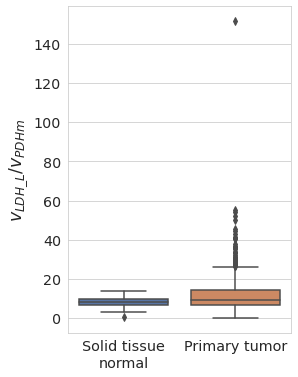


 ==================================================== o ===================================================== 

Breast
	p-value: 9.000082760606048e-21


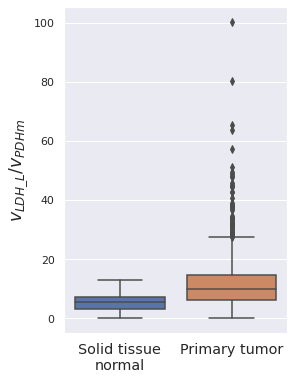


 ==================================================== o ===================================================== 

Kidney
	p-value: 6.761580640446417e-05


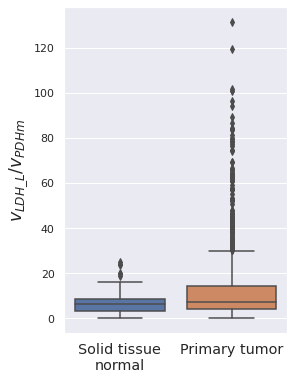

In [5]:
### Figure 6.B:
# -----------
for cancer in ["Bronchus-Lung", "Breast", "Kidney"]:
    print ('\n',' o '.center(108, '='),'\n')
    print(cancer)
    
    data = pd.read_csv(cancer+"_InputData.csv", sep="\t", lineterminator="\n").set_index("Condition")
    fluxes = pd.read_csv(cancer+"_fluxes.csv", sep="\t").set_index("Reaction")

    #### OBTAINS THE FLUXES OF REACTIONS
    A = time.time()

    # Table of results
    results = pd.DataFrame(index=["R_LDH_L","R_LDH_Lm", "R_PDHm", "R_EX_lac__L_e"], columns=data.index)
    sumV = 0
    for i in range(len(data)):
        condition = data.index[i]
        sumV = abs(fluxes[fluxes.columns[i]]).sum()
        for j, reaction in enumerate(results.index):
            v = (fluxes[fluxes.columns[i]].loc[reaction])
            log_vg = ( (v/sumV) )# / (g/sumG) )

            # dataframe
            results[condition].loc[reaction] = log_vg


    ## LDH Y PDH ratio
    ldh_pdh = []
    for sample in results.columns:
        v_ldh = results[sample].loc["R_LDH_L"]
        v_pdh = results[sample].loc["R_PDHm"]  

        v_ldh_pdh = abs(v_ldh / v_pdh)

        ldh_pdh.append(v_ldh_pdh)

    results.loc["LDH_L/PDHm"] = ldh_pdh

    # EDIT DATAFRAME COLUMNS
    new_columns = []
    for col in results.columns:
        if "PrimaryTumor" in col:
            new_columns.append("PrimaryTumor")
        elif "SolidTissueNormal" in col:
            new_columns.append("SolidTissueNormal")
        else:
            new_columns.append(col)
    results.columns = new_columns

    for column in set(results.columns):
        if column == "PrimaryTumor" or column == "SolidTissueNormal":continue
        results = results.drop([column], axis=1)
    
    ## FIGURES
    for rxn in ["LDH_L/PDHm"]:#["R_LDH_L","R_PDHm","LDH_L/PDHm","R_EX_lac__L_e"]: # R_LDH_Lm
        # u-test:
        tumor = results["PrimaryTumor"].loc[rxn]
        normal = results["SolidTissueNormal"].loc[rxn]
        
        if tumor.mean() > normal.mean():
            stat, pvalue = mannwhitneyu(tumor, normal, alternative="greater")

        elif tumor.mean() < normal.mean():
            stat, pvalue = mannwhitneyu(tumor, normal, alternative="less")

        print ("\tp-value:", pvalue)

        # Create new plot, setting a logarithmic scale for y
        figsize = (4,6)
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        sns.set(style="darkgrid")
        fig.patch.set_alpha(1)

        sns.boxplot(x=results.columns, y=results.loc[rxn], order=["SolidTissueNormal", "PrimaryTumor"])#, showfliers=False)
        plt.ylabel("$v_{LDH\_L}/v_{PDHm}$", fontsize="x-large")
        plt.xticks(ticks=[0,1], labels=["Solid tissue\nnormal", "Primary tumor"], fontsize="large")
        
        if rxn == "LDH_L/PDHm":
            rxn = "LDH_L-PDHm"
#         plt.savefig(cancer+'_'+rxn+'.svg', bbox_inches="tight") #save fig
        plt.show()

In [6]:
# TO FIGURE 6.A:
##############################################################################
## load RECON3D json file
json_annotations = requests.get('http://bigg.ucsd.edu/static/models/Recon3D.json').json()
model = cobra.io.read_sbml_model("../../examples/data/gems/Recon3D.xml")
##############################################################################
## extract subsystem for each reaction
subsystems_list = set()
for i in range(len(model.reactions)):
    annotation = json_annotations['reactions'][i]
    subsystems_list.add(annotation['subsystem'])

##############################################################################
## assigns the reactions to their respective subsystem
subsystems = {}
for subsyst in subsystems_list:
    subsystems[subsyst] = set()
    for i in range(len(model.reactions)):
        subsystem = json_annotations['reactions'][i]['subsystem']
        if subsyst == subsystem:
            ID = 'R_'+json_annotations['reactions'][i]['id']
            subsystems[subsyst].add(ID)

##############################################################################
## metabolic pathways
path = {
    "Glycolysis/gluconeogenesis": "GG",
    "Oxidative phosphorylation": "OXP",
    "Pyruvate metabolism": "PM",
    "Glutamate metabolism": "GM",
    "Alanine and aspartate metabolism": "AAM",
    "CoA catabolism": "CC",
    "CoA synthesis": "CS",
    "Arginine and proline metabolism": "APM",
    "Tryptophan metabolism": "TM",
    "Citric acid cycle": "TCA",
    "Nucleotide metabolism": "NM",
    "NAD metabolism": "NAD",
    "Fatty acid synthesis": "FAS",
    "Fatty acid oxidation": "FAO",
    "Cholesterol metabolism": "CM",
    "Transport, mitochondrial": "Mt",
}

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled



 ==================================================== o ===================================================== 

Bronchus-Lung
- Glycolysis/gluconeogenesis 	| p-value: 5.52773871071097e-50
- Citric acid cycle 	| p-value: 1.0953789958713932e-53
- Glutamate metabolism 	| p-value: 1.9330957010417315e-47
- Arginine and proline metabolism 	| p-value: 4.097566536709705e-61
- NAD metabolism 	| p-value: 4.4965840018755695e-12
- Alanine and aspartate metabolism 	| p-value: 2.067245538100152e-56
- Transport, mitochondrial 	| p-value: 0.0457317981484632
- Nucleotide metabolism 	| p-value: 1.3070420292875602e-27
- CoA synthesis 	| p-value: 9.921396813339284e-40
- CoA catabolism 	| p-value: 1.011262441016872e-10
- Cholesterol metabolism 	| p-value: 2.2166839500125323e-41
- Fatty acid synthesis 	| p-value: 8.039859807614186e-06
- Fatty acid oxidation 	| p-value: 2.531795519518279e-28
- Tryptophan metabolism 	| p-value: 2.3312130927682254e-26
- Pyruvate metabolism 	| p-value: 0.0001326206236477
- Oxi

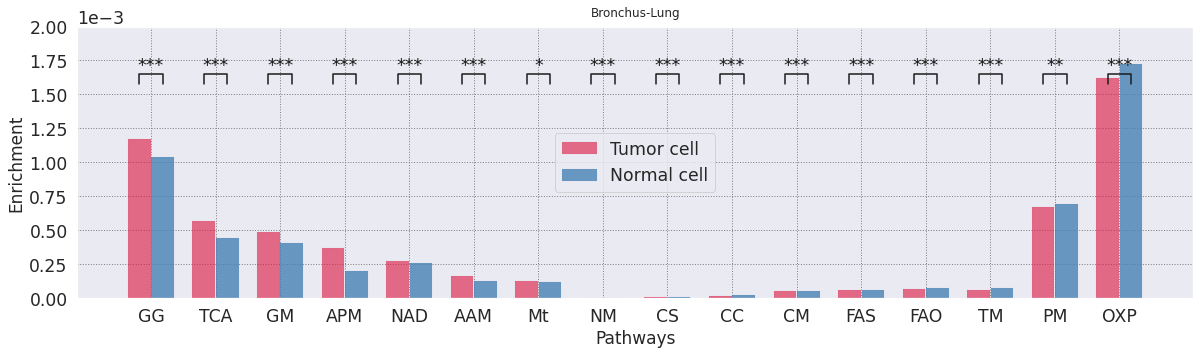


 ==================================================== o ===================================================== 

Breast
- Glycolysis/gluconeogenesis 	| p-value: 5.0076931084840685e-34
- Citric acid cycle 	| p-value: 1.2941442944559625e-06
- Glutamate metabolism 	| p-value: 0.0027555467749928
- Arginine and proline metabolism 	| p-value: 3.029162500268736e-36
- NAD metabolism 	| p-value: 0.0056885093989613
- Alanine and aspartate metabolism 	| p-value: 2.703104018179209e-11
- Transport, mitochondrial 	| p-value: 3.358462919415372e-10
- CoA catabolism 	| p-value: 0.0042820734796785
- Nucleotide metabolism 	| p-value: 2.1239038820127656e-18
- CoA synthesis 	| p-value: 4.043314647438089e-46
- Cholesterol metabolism 	| p-value: 3.8088830049684534e-08
- Fatty acid synthesis 	| p-value: 0.2631805519661817
- Fatty acid oxidation 	| p-value: 4.657802009094001e-13
- Tryptophan metabolism 	| p-value: 7.94745043755165e-23
- Pyruvate metabolism 	| p-value: 9.518636964206208e-40
- Oxidative phosphor

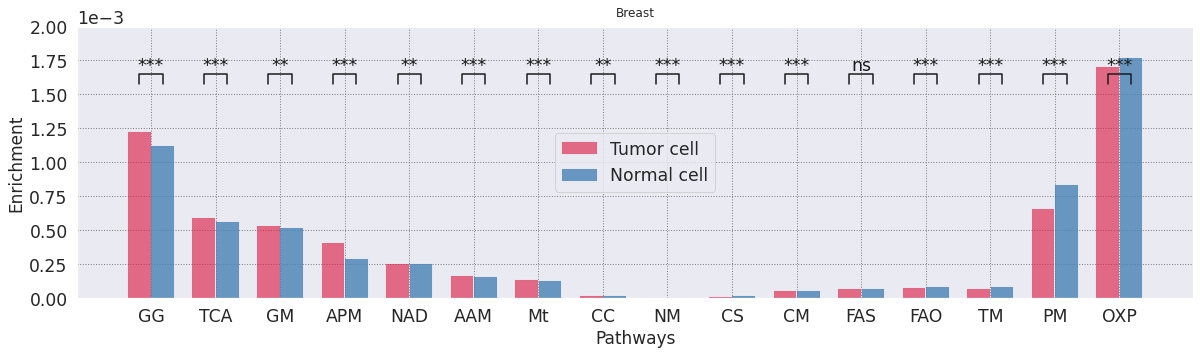


 ==================================================== o ===================================================== 

Kidney
- Glycolysis/gluconeogenesis 	| p-value: 1.116147140053911e-40
- NAD metabolism 	| p-value: 0.0065531639604238
- Arginine and proline metabolism 	| p-value: 2.3513215391109578e-08
- Fatty acid synthesis 	| p-value: 1.759410697250747e-07
- CoA catabolism 	| p-value: 0.509269225602932
- Nucleotide metabolism 	| p-value: 0.2336912423186643
- CoA synthesis 	| p-value: 2.6803132583444077e-28
- Cholesterol metabolism 	| p-value: 6.789573001739207e-30
- Fatty acid oxidation 	| p-value: 1.213926289319765e-15
- Tryptophan metabolism 	| p-value: 1.1202105429706834e-23
- Transport, mitochondrial 	| p-value: 0.0005703983098934
- Alanine and aspartate metabolism 	| p-value: 3.464834519271932e-16
- Citric acid cycle 	| p-value: 7.135942045632192e-12
- Glutamate metabolism 	| p-value: 7.579393320256506e-15
- Pyruvate metabolism 	| p-value: 6.277636339643242e-26
- Oxidative phosphory

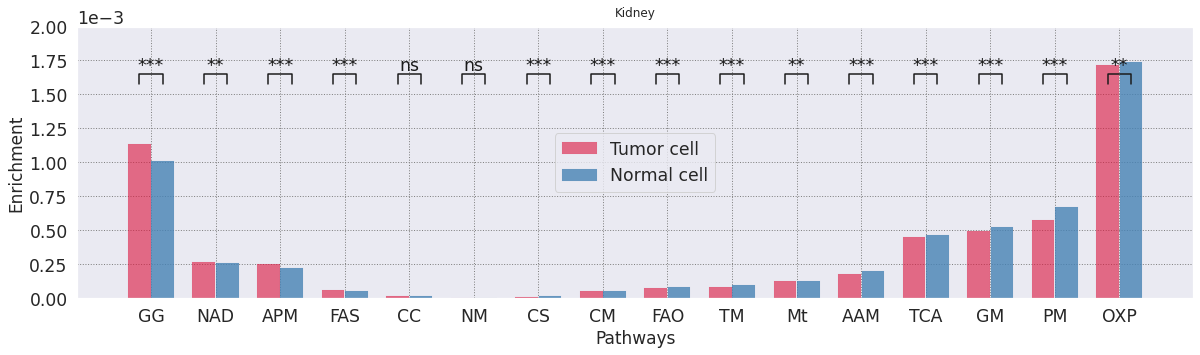

In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

for cancer in ["Bronchus-Lung", "Breast", "Kidney"]:
    print ('\n',' o '.center(108, '='),'\n')
    print(cancer)
    # LOAD P-VALUES
    path_pvalue = pd.read_csv(cancer+"_pvalues-pathways.csv", sep="\t", lineterminator="\n").set_index("Unnamed: 0")
    tmp_path_value = path_pvalue[path_pvalue.index.isin(list(path.keys()))].sort_values(by="difference")
    
    ###  
    tumor_path = tmp_path_value[tmp_path_value["difference"]<0].sort_values(by="mean $v_i$ tumor",ascending=False)
    normal_path = tmp_path_value[tmp_path_value["difference"]>0].sort_values(by="mean $v_i$ normal")
    tmp_path_value = pd.concat([tumor_path, normal_path], axis=0)
        
    x1 = tmp_path_value["mean $v_i$ tumor"]
    x2 = tmp_path_value["mean $v_i$ normal"]
    
    ### GRAPHICS PARAMETERS:
    size=23
    params = {'legend.fontsize': 12,
              'axes.labelsize': 17,
              'axes.titlesize': size*0.75,
              'xtick.labelsize': size*0.75,
              'ytick.labelsize': size*0.75,
              'figure.figsize': (13*0.65,6.5*0.75),
              'axes.titlepad': 10,
              "axes.formatter.limits": [-2, 6],
              'text.usetex': False}
    plt.rcParams.update(params)
    
    labels = []
    for pathway in tmp_path_value.index:
        labels.append(path[pathway])    
    
    # U-TEST: ADD ASTERISK
    figsize = (20,5)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.set(style="darkgrid")
    fig.patch.set_alpha(1)
    width = 0.35 
    for i, pathway in enumerate(tumor_path.index.to_list() + normal_path.index.to_list()):
        pvalue = tmp_path_value["p-value"].loc[pathway]

        if pvalue < 0.0001:
            sig = "***"
        elif pvalue < 0.01:
            sig = "**"
        elif pvalue < 0.05:
            sig = "*"
        elif pvalue > 0.05:
            sig = "ns"
        print ("-", pathway, "\t| p-value:", pvalue)


        # STATISTICAL ANNOTATION
        x_1, x_2 = i - width/1.93, i + width/1.93   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())       
        y, h, col = 0.00150 + 0.00150*0.05, 0.00150*0.05, 'k'
        plt.plot([x_1, x_1, x_2, x_2], [y, y+y*0.05, y+y*0.05, y], lw=1.5, c=col)
        plt.text((x_1+x_2)*.5, y+h, sig, ha='center', va='bottom', color=col, fontsize="x-large")
    
    # GRAPHIC
    n = np.arange(len(labels)) 
    plt.bar( n - width/1.93, x1, width, label='Tumor cell'
           , color='crimson', alpha=0.6, edgecolor='crimson', linewidth=0.05)
    plt.bar( n + width/1.93, x2, width, label='Normal cell'
           , color='steelblue', alpha=0.8, edgecolor='steelblue', linewidth=0.05)
    plt.grid(color='grey',linestyle='dotted')

    plt.title(cancer)
    plt.ylabel("Enrichment")
    plt.xlabel("Pathways")
    plt.legend(fontsize="x-large")

    plt.ylim(0, 0.0020)
    plt.xticks(ticks=n, labels=labels)   
    
#     plt.savefig(cancer+'.svg', bbox_inches="tight") #save fig
    plt.show()

#     break